The confusion matrix 
 [[106   2]
 [ 61   2]]


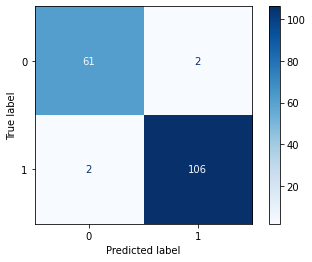

In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target   # 0 = malignant, 1 = benign

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Logistic Regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Build Confusion Matrix From Scratch
# Initialize values 
TP = TN = FP = FN = 0

for actual, predicted in zip(y_test,y_pred):
    if actual == 1 and predicted == 1:
        TP += 1
    elif actual == 0 and predicted == 0:
        TN += 1
    elif actual == 0 and predicted == 1:
        FP +=1 
    elif actual == 1 and predicted == 0 :
        FN +=1
        
confusion_matrix_manual = np.array([
    [TP,FP],
    [TN,FN]
])

print(f"The confusion matrix \n {confusion_matrix_manual}")

# Visualize Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,y_pred,cmap = "Blues"
)

plt.show()

### Accuracy (Manual)
$$Accuracy= \frac{TP+TN}{TP+TN+FP+FN}$$

In [10]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy


0.9766081871345029

### Precision (Manual)

$$ Precision=\frac{TP}{FP+ TP}$$

In [11]:
precision = TP / (TP + FP)
precision


0.9814814814814815

### Recall / Sensitivity (Manual)

$$ Recall = \frac{𝑇𝑃}{TP+FN}$$



In [12]:
recall = TP / (TP + FN)
recall


0.9814814814814815

### F1-Score (Manual)

$$ F1 =2 \times \frac{Precision \times Recall}{Precision+Recall} $$



In [13]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score


0.9814814814814815

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Accuracy : 0.9766081871345029
Precision: 0.9814814814814815
Recall   : 0.9814814814814815
F1-score : 0.9814814814814815


#### Why Accuracy Can Be Misleading

Imagine:
- 95% samples are benign
- Model predicts everything as benign

Accuracy ≈ 95%
But Recall for malignant = 0

That’s why Precision, Recall, and F1 are critical in:
- Medical diagnosis
- Fraud detection
- Spam filtering

### Quick Summary

| Metric    | Best When                          |
| --------- | ---------------------------------- |
| Accuracy  | Balanced datasets                  |
| Precision | False positives are costly         |
| Recall    | False negatives are costly         |
| F1-score  | Balance between precision & recall |


### ROC Curve & AUC 
-  ROC curve: TPR vs FPR at different thresholds 
-  AUC: area under ROC curve → 1 is perfect, 0.5 is random

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target   # Binary labels (0, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Logistic Regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Probability of positive class (class = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# y_prob

### Compute TPR & FPR From Scratch
Definitions
- TPR (Recall) = TP / (TP + FN)
- FPR = FP / (FP + TN)

In [23]:
def compute_tpr_fpr(y_true, y_prob, threshold):
    TP = FP = TN = FN = 0

    for actual, prob in zip(y_true, y_prob):
        predicted = 1 if prob >= threshold else 0

        if actual == 1 and predicted == 1:
            TP += 1
        elif actual == 0 and predicted == 0:
            TN += 1
        elif actual == 0 and predicted == 1:
            FP += 1
        elif actual == 1 and predicted == 0:
            FN += 1

    tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

    return tpr, fpr


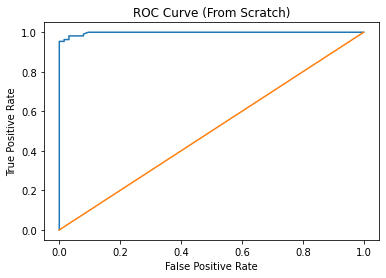

In [24]:
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []

for threshold in thresholds:
    tpr, fpr = compute_tpr_fpr(y_test, y_prob, threshold)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC Curve (Manual)

plt.figure()
plt.plot(fpr_list, tpr_list)
plt.plot([0, 1], [0, 1])  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (From Scratch)")
plt.show()


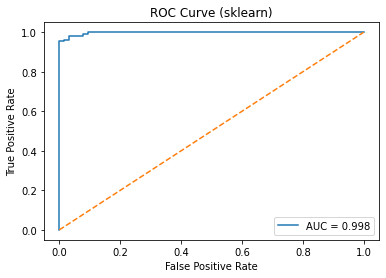

In [25]:
# Verify Using sklearn
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_sklearn = auc(fpr, tpr)

# auc_sklearn

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_sklearn:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (sklearn)")
plt.show()



### Interpretation

| AUC Value | Meaning            |
| --------- | ------------------ |
| 1.0       | Perfect classifier |
| 0.9 – 1.0 | Excellent          |
| 0.8 – 0.9 | Good               |
| 0.7 – 0.8 | Fair               |
| 0.5       | Random guessing    |



#### Why ROC & AUC Matter
- Threshold-independent evaluation
- Works well with imbalanced datasets
- Shows tradeoff between sensitivity & false alarms